In [9]:
import numpy as np
from matplotlib import pyplot as plt

### Postlab Q1

The most straightforward way of obtaining a velocity estimate is to use the first-order discrete derivative, also called the Euler backward method, where $\Delta t$ is the sampling period and $x_i$ the position of the ball at timestep i:
$$ v_{x,i} \approx \frac{x_i - x_{i-1}}{\Delta t}$$
The file `pos_logfile.csv` contains a trajectory which was generated by moving the plate by hand and logging the ball coordinates. We will use it to test our velocity signal before we implement it in the C language controller.

Use the provided skeleton to compute the Euler backward estimate of $v_x$ with a sampling frequency of $f = 60Hz$.

Hand in a plot with the velocity estimate in the time range $t \in [10, 15]$ s (Don’t forget the axis labels and plot title). 

Describe your observations, and how they might impact the controller performance.

In [10]:
# Make sure that file path is correct
xraw, yraw = np.loadtxt('./pos_logfile.csv', skiprows = 1, unpack=True, delimiter = ",")

frequency = 60
time_range = range(10*60, 15*60+1)
t = [i/60 for i in time_range]
x_clipped, y_clipped = xraw[time_range], yraw[time_range]

/var/folders/2v/kl3b6101373f0lf84w8c5wsw0000gn/T/ipykernel_4237/4117661787.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


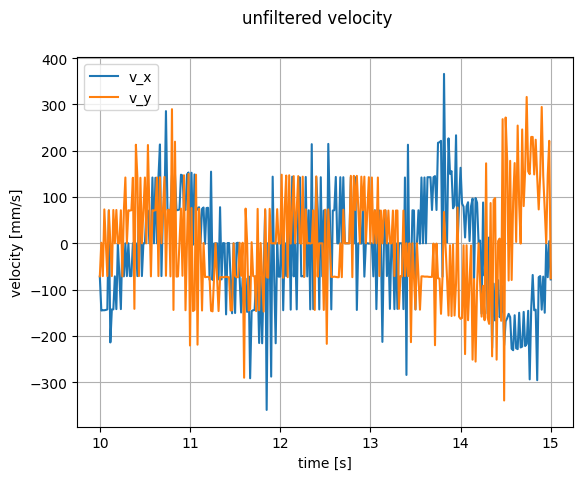

In [11]:

v_x = [(xraw[i+1]-xraw[i])*60 for i in time_range]
v_y = [(yraw[i+1]-yraw[i])*60 for i in time_range]

fig, axs = plt.subplots(1, 1)

fig.suptitle("unfiltered velocity")
axs.plot(t, v_x, label='v_x')
axs.plot(t, v_y, label='v_y')
axs.set_xlabel('time [s]')
axs.set_ylabel('velocity [mm/s]')
axs.legend()
axs.grid(True)

fig.show()

/var/folders/2v/kl3b6101373f0lf84w8c5wsw0000gn/T/ipykernel_4237/3317053225.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


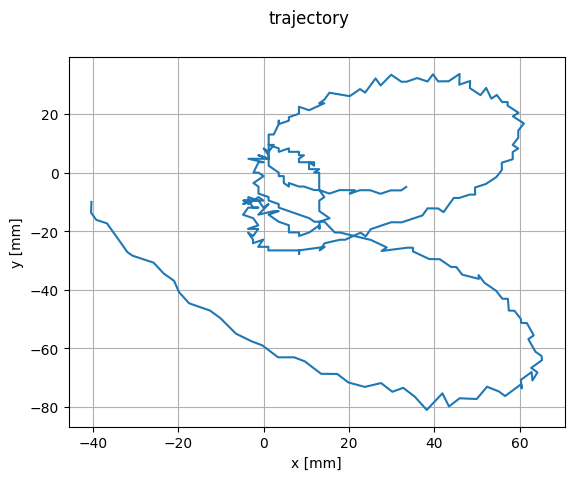

In [12]:
# Check out how the position trjactories look like and plot the clipped postition trajectory
fig, axs = plt.subplots(1, 1)

fig.suptitle("trajectory")
axs.plot(x_clipped, y_clipped)
axs.set_xlabel('x [mm]')
axs.set_ylabel('y [mm]')
axs.grid(True)

fig.show()

### Postlab Q2

In the IRM lecture, you have learned about the Moving Average (MA) filter. We will use it to improve our velocity estimate. We prevent noise amplification by first filtering the position data and then calculating the velocity instead of filtering the velocity calculated in Q1. For a window size n and unfiltered position values x, the filtered position output y is given by:
$$ y_i = \frac{x_{i-n+1}+ ... + x_i}{n}$$

Use the provided skeleton to compute the filtered velocity signal for $n = [1,5,10,20,30,50,100]$ and compare the resulting signals (window size and delay to unfiltered signal). 

Explain the influence of smaller and larger window sizes on the filter performance and associated delay. Assuming that the delay of the filtered signal should not exceed 0.16s, propose a filter window size which should be implemented in the controller. 

Provide 2 plots with $t \in [10,12]$ s with the following elements:

- Plot 1
    * The unfiltered velocity signal.
    * Comprehensive title and axis labels.
- Plot 2
    * All of the filtered velocity signals.
    * A comprehensive legend, title and axis labels.
    * The legend should include the window size and delay to the unfiltered velocity signal.
- Explanations:
    * Explanation of the influence of the window size on the noise of the signal and associated delay.
    * Proposed window size for the controller.

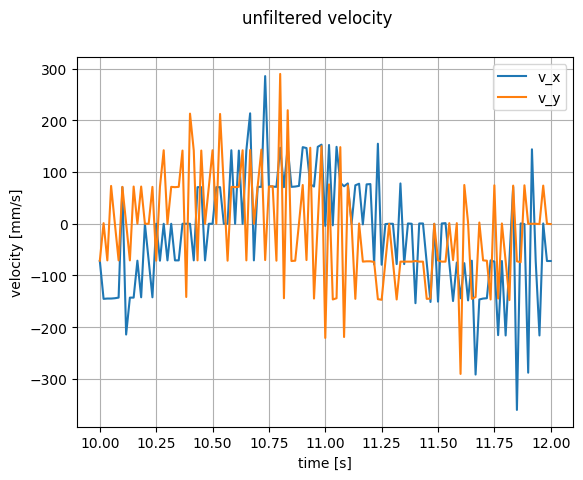

In [13]:
# Plot 1: Plot the unfiltered velocity v_x

frequency = 60
time_range = range(10*60, 12*60+1)
t = [i/60 for i in time_range]
x_clipped, y_clipped = xraw[time_range], yraw[time_range]

v_x = [(xraw[i+1]-xraw[i])*60 for i in time_range]
v_y = [(yraw[i+1]-yraw[i])*60 for i in time_range]

fig, axs = plt.subplots(1, 1)

fig.suptitle("unfiltered velocity")
axs.plot(t, v_x, label='v_x')
axs.plot(t, v_y, label='v_y')
axs.set_xlabel('time [s]')
axs.set_ylabel('velocity [mm/s]')
axs.legend()
axs.grid(True)

In [14]:
def moving_average(x: np.array, m: int) -> np.array:
    x_avg = []

    sum = 0
    length = 0
    
    for i in range(len(x)):
        if length < m: # the size of data does not reached filter length
            sum += x[i]
            length += 1
        else: # length reached the filter length
            sum += x[i] - x[i-m]
        x_avg.append(sum/length)
    
    return np.array(x_avg)

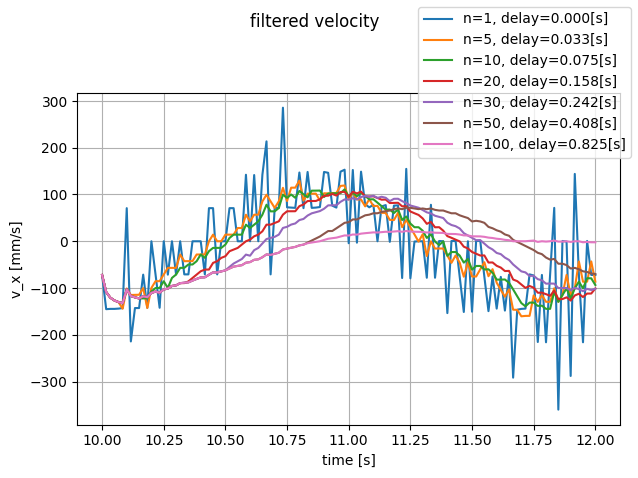

In [19]:
# Plot 2: Plot all the filtered velovcity signals v_x

fig, axs = plt.subplots(1, 1)

n = [1, 5, 10, 20, 30, 50, 100]

fig.suptitle("filtered velocity\n\n")
axs.set_xlabel('time [s]')
axs.set_ylabel('v_x [mm/s]')
axs.grid(True)

for i in range(len(n)):
    v_x_filtered = moving_average(v_x, n[i])
    axs.plot(t, v_x_filtered, label='n={0}, delay={1:.3f}[s]'.format(n[i], (n[i]-1)/60/2))

fig.legend()
fig.tight_layout()